<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/creditfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [27]:
data = pd.read_csv("creditcard.csv")

In [28]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [29]:
print(data.shape)
print(data.describe())

(9965, 31)
               Time           V1           V2           V3           V4  \
count   9965.000000  9965.000000  9965.000000  9964.000000  9964.000000   
mean    5934.484897    -0.241681     0.280693     0.906359     0.260247   
std     4449.407112     1.522695     1.308882     1.156948     1.440500   
min        0.000000   -27.670569   -34.607649   -15.496222    -4.657545   
25%     2061.000000    -1.012157    -0.208591     0.412198    -0.615591   
50%     4547.000000    -0.372624     0.286179     0.943149     0.218492   
75%    10163.000000     1.151506     0.900823     1.601871     1.119367   
max    14864.000000     1.960497     8.636214     4.101716    10.463020   

                V5           V6           V7           V8           V9  ...  \
count  9964.000000  9964.000000  9964.000000  9964.000000  9964.000000  ...   
mean     -0.046342     0.132335    -0.071847    -0.065317     0.801220  ...   
std       1.183634     1.307586     1.077872     1.260140     1.156424  ... 

In [30]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0038283296393310496
Fraud Cases: 38
Valid Transactions: 9926


In [32]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


,Amount
count,38.000000
mean,75.730526
std,304.521215
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1809.680000


In [34]:
print("details of valid transaction")
valid.Amount.describe()


details of valid transaction


,Amount
count,9926.000000
mean,62.919501
std,184.041297
min,0.000000
25%,5.172500
50%,15.950000
75%,51.067500
max,7712.430000


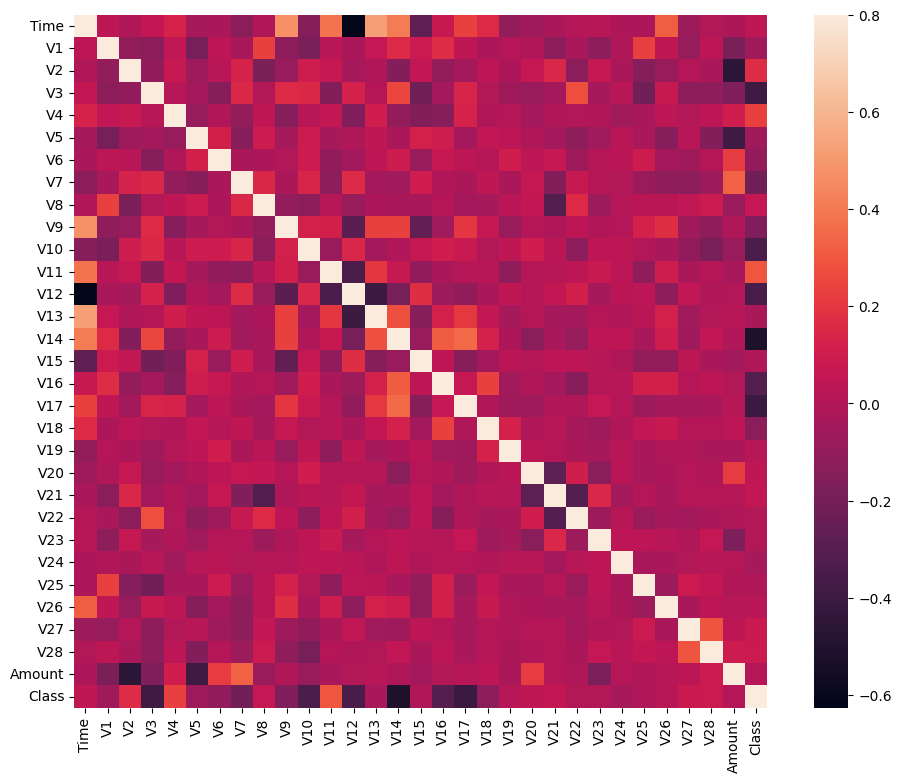

In [36]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [37]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values


(9965, 30)
(9965,)


In [44]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

yTrain_imputed = imputer.fit_transform(yTrain.reshape(-1, 1))

yTrain_imputed = yTrain_imputed.ravel()



rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain_imputed)
yPred = rfc.predict(xTest)

In [46]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9989964877069744
The precision is 1.0
The recall is 0.7777777777777778
The F1-Score is 0.875
The Matthews correlation coefficient is0.881472924811526


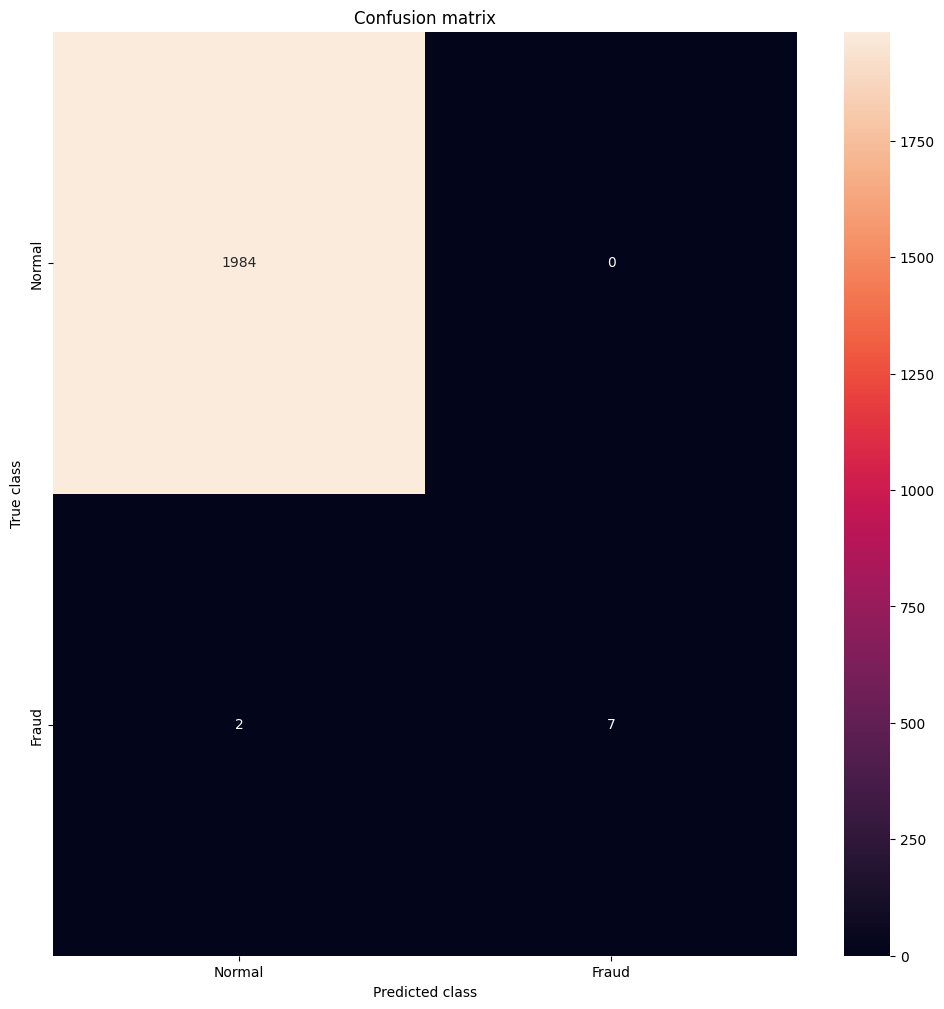

In [47]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
